In [5]:
#importing packages needed
import requests
import pandas as pd
import json
import seaborn as sns
from matplotlib import pyplot as plt

In [6]:
df_customers = pd.read_csv('enriched_customer_file.csv')
df_customers.head()

,Unnamed: 0,name,age,job,incomeUSD,creditScore,ccNumber,married,hasChildren,height,...,address.countryCode,height_inches,weight_pounds,bmi,health,healthy_bmi_range,income level,region,state_population,state_per_capita_income
0,0,Charolette Carroll,42,Anthropologist,71247,823,6007-2224-9881-3450,False,False,166.0,...,BD,65.354331,178.1640,29.32,Overweight,18.5 - 25,Middle income,Midwest,779094,"66,184"
1,1,Lizette Muller,45,Uber Driver,31092,639,6771-8987-0818-5229,True,True,171.0,...,US,67.322835,144.4275,22.40,Normal,18.5 - 25,Low income,West,7151502,"56,667"
2,2,Ezra Champlin,19,Nuclear Medicine Technologist,82922,558,3742-496036-15098,False,False,160.0,...,BN,62.992126,121.2750,21.48,Healthy weight,5 - 85,Middle income,Northeast,3605944,"84,972"
3,3,Luana Jacobi,23,Retired,16786,797,6767-8698-8214-3742-85,True,False,160.0,...,ZM,62.992126,109.3680,19.37,Normal,18.5 - 25,Low income,Northeast,20201249,"78,089"
4,4,Wilmer Skiles,33,Psychiatrist,122929,543,6709009668675160,True,True,175.0,...,RW,68.897638,145.5300,21.55,Normal,18.5 - 25,Middle income,West,7705281,"75,698"


In [7]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 39 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               296 non-null    int64  
 1   name                     296 non-null    object 
 2   age                      296 non-null    int64  
 3   job                      296 non-null    object 
 4   incomeUSD                296 non-null    int64  
 5   creditScore              296 non-null    int64  
 6   ccNumber                 296 non-null    object 
 7   married                  296 non-null    bool   
 8   hasChildren              296 non-null    bool   
 9   height                   296 non-null    float64
 10  weight                   296 non-null    float64
 11  eyeColor                 296 non-null    object 
 12  email                    296 non-null    object 
 13  gender                   296 non-null    object 
 14  hasDegree                2

In [13]:

df_customers.columns

df_income = df_customers[['name','incomeUSD','address.state','region','income level','state_per_capita_income']]

In [12]:
df_income.head()

,name,incomeUSD,address.state,region,income level,state_per_capita_income
0,Charolette Carroll,71247,North Dakota,Midwest,Middle income,"66,184"
1,Lizette Muller,31092,Arizona,West,Low income,"56,667"
2,Ezra Champlin,82922,Connecticut,Northeast,Middle income,"84,972"
3,Luana Jacobi,16786,New York,Northeast,Low income,"78,089"
4,Wilmer Skiles,122929,Washington,West,Middle income,"75,698"


In [15]:
df_health = df_customers[['name','height', 'weight','height_inches', 'weight_pounds', 'bmi',
       'health', 'healthy_bmi_range']]

In [21]:
df_health.head()

,name,height,weight,height_inches,weight_pounds,bmi,health,healthy_bmi_range
0,Charolette Carroll,166.0,80.8,65.354331,178.1640,29.32,Overweight,18.5 - 25
1,Lizette Muller,171.0,65.5,67.322835,144.4275,22.40,Normal,18.5 - 25
2,Ezra Champlin,160.0,55.0,62.992126,121.2750,21.48,Healthy weight,5 - 85
3,Luana Jacobi,160.0,49.6,62.992126,109.3680,19.37,Normal,18.5 - 25
4,Wilmer Skiles,175.0,66.0,68.897638,145.5300,21.55,Normal,18.5 - 25


In [34]:
health_counts = df_health['health'].value_counts()

print(health_counts)

Normal               165
Overweight            88
Healthy weight        18
Obese Class I         12
Mild Thinness          7
Severe Thinness        2
Obese Class II         2
Moderate Thinness      1
Name: health, dtype: int64


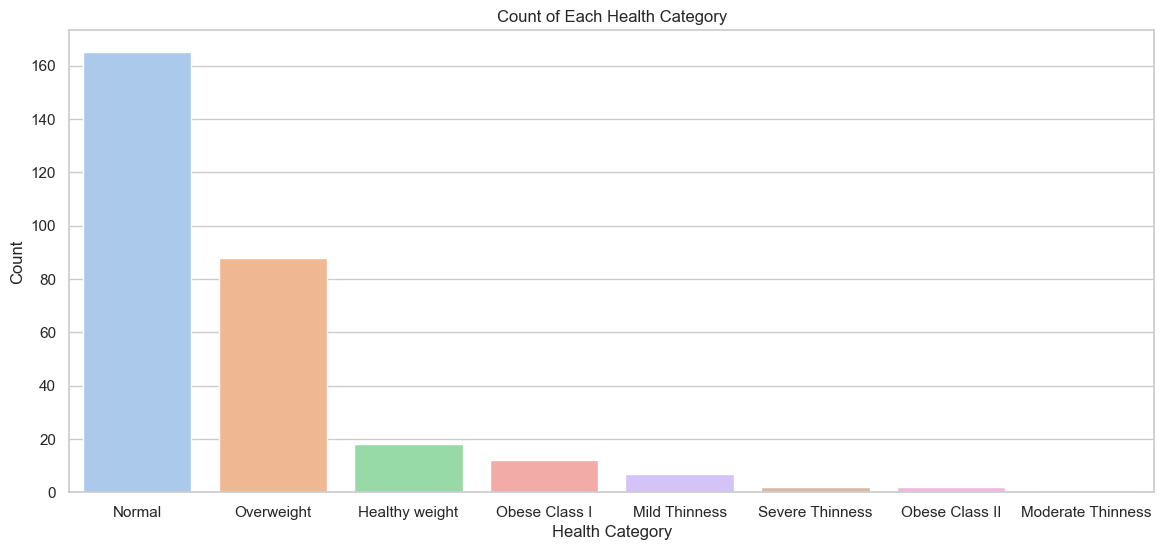

In [38]:
# Create a bar chart using seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(14, 6))
sns.barplot(x=health_counts.index, y=health_counts.values, palette="pastel")
plt.xlabel("Health Category")
plt.ylabel("Count")
plt.title("Count of Each Health Category")
plt.show()

IndexingError: Too many indexers